In [144]:
import numpy as np
import mne
from tqdm import tqdm
from ARMA import ARMA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
def load_EEG(filepath, label) -> (np.ndarray, np.ndarray):
    if label == 'preictal':
        data = np.load(filepath)
        target = np.ones(data.shape[1])
    if label == 'interictal':
        data = mne.io \
        .read_raw_edf(input_fname=filepath, preload=False, verbose='Error') \
        .get_data(picks='all', units='uV', return_times=False)
        target = -1
    return data, target

In [3]:
root = '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/' 
case = 'chb01/'
preictal_filenames = ['chb01_03_preictal.npy', 'chb01_04_preictal.npy', 'chb01_15_preictal.npy', 'chb01_16_preictal.npy',
             'chb01_18_preictal.npy', 'chb01_26_preictal.npy']
interictal_filenames = ['chb01_01.edf', 'chb01_02.edf', 'chb01_05.edf',
                        'chb01_06.edf', 'chb01_07.edf', 'chb01_08.edf']

In [8]:
# load preictal and interictal data
preictal_data_list = []
preictal_target_list = []
interictal_data_list = []
interictal_target_list = []
for i in tqdm(range(6)):
    p_filepath = root + case + preictal_filenames[i]
    ic_filepath = root + case + interictal_filenames[i]
    p_data, p_target = load_EEG(p_filepath, 'preictal')
    ic_data, ic_target = load_EEG(ic_filepath, 'interictal')
    preictal_data_list.append(p_data)
    interictal_data_list.append(ic_data)
    interictal_target_list.append(ic_target)
    preictal_target_list.append(p_target)

100%|██████████| 6/6 [00:09<00:00,  1.50s/it]


In [90]:
# ARMA parameters
seed = 42
fs = 256                 # sampling frequency (Hz)
N = 512                  # fs = N*fp (N must be a natural number)
fp = fs/N                # prediction frequency
n_i = 2                  # AR model order
t_s = 1/fs               # Input signal time period
n_c = 23                 # Number of EEG electrodes (channels)
m = 30                   # MA parameter
print(f'Input channels: {n_c}')
print(f'Model: AR({n_i})')
print(f'MA lookback: {m}')
print(f'Window size: {N}')
print(f'Sampling frequency: {fs} Hz')
print(f'Prediction frequency: {fp} Hz')

Input channels: 23
Model: AR(2)
MA lookback: 30
Window size: 512
Sampling frequency: 256 Hz
Prediction frequency: 0.5 Hz


  0%|          | 3583/921086 [00:00<00:25, 35318.48it/s]

KFold(n_splits=6, random_state=None, shuffle=False)
ShuffleSplit(n_splits=6, random_state=0, test_size=0.8, train_size=None)
-
Run: 1
Interictal TRAIN: [4] Interictal TEST: [5 2 1 3 0]
4 chb01_07.edf (23, 921600)
5 chb01_08.edf (23, 921600)
2 chb01_05.edf (23, 921600)
1 chb01_02.edf (23, 921600)
3 chb01_06.edf (23, 921600)
0 chb01_01.edf (23, 921600)
---


  1%|          | 2047/229887 [00:00<00:12, 18150.52it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  3%|▎         | 7167/229887 [00:00<00:03, 67015.73it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  3%|▎         | 7679/229887 [00:00<00:02, 74654.20it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  3%|▎         | 7679/229887 [00:00<00:03, 73644.52it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  0%|          | 1023/229887 [00:00<00:26, 8606.76it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [01:17<00:00, 62191.05it/s] 


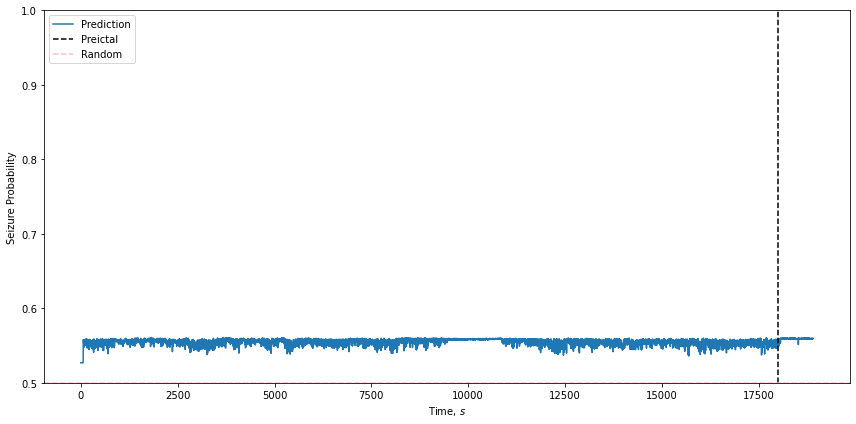

  2%|▏         | 4095/229887 [00:00<00:05, 39990.21it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  4%|▎         | 8191/229887 [00:00<00:02, 81323.56it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 12739/229887 [00:00<00:01, 127386.17it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▍         | 10751/229887 [00:00<00:02, 105597.70it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 127367.30it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:54<00:00, 88603.42it/s] 


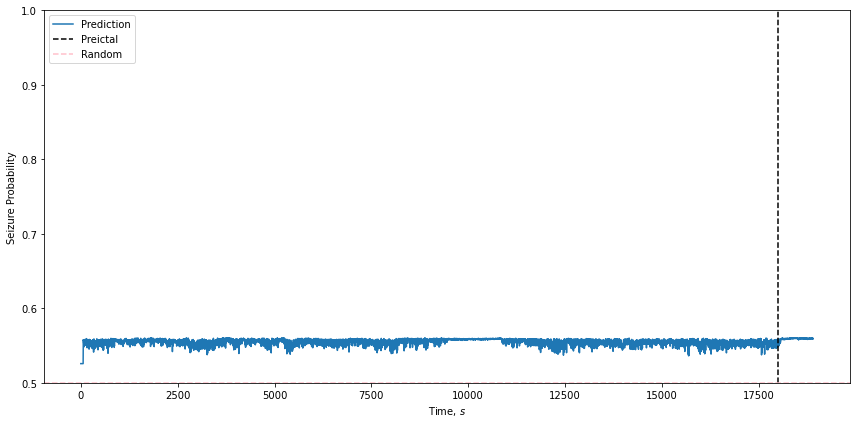

  9%|▉         | 20479/229887 [00:00<00:01, 106482.15it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 118979.31it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126460.88it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 115225.44it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 117667.35it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:55<00:00, 86934.35it/s] 


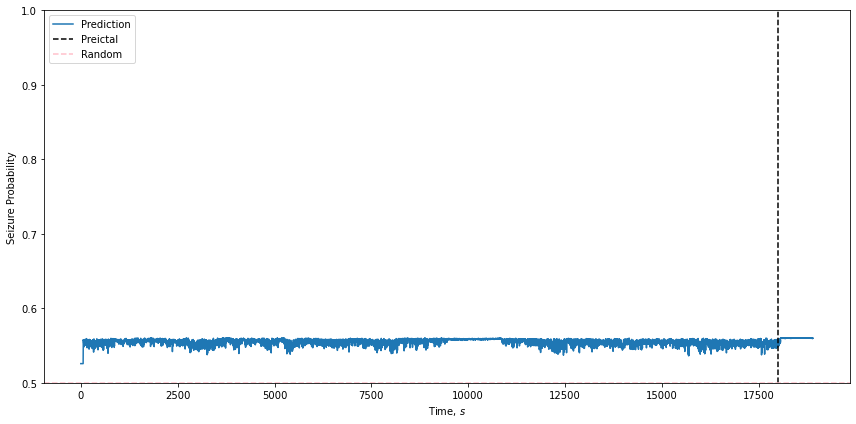

  2%|▏         | 5631/229887 [00:00<00:04, 55534.69it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 129901.53it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 121222.43it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137330.38it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  3%|▎         | 7679/229887 [00:00<00:02, 75938.77it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:54<00:00, 89248.79it/s] 


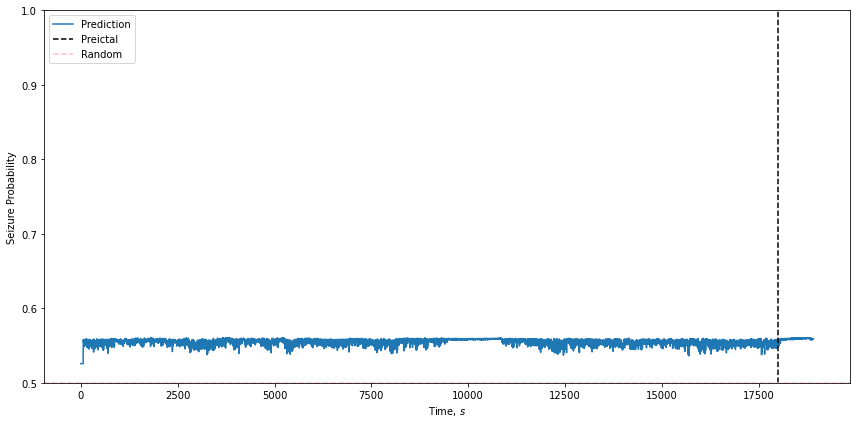

  2%|▏         | 5119/229887 [00:00<00:04, 48913.97it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▍         | 11212/229887 [00:00<00:01, 112115.56it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 132189.84it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 130530.82it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 144024.05it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [01:05<00:00, 74002.11it/s] 


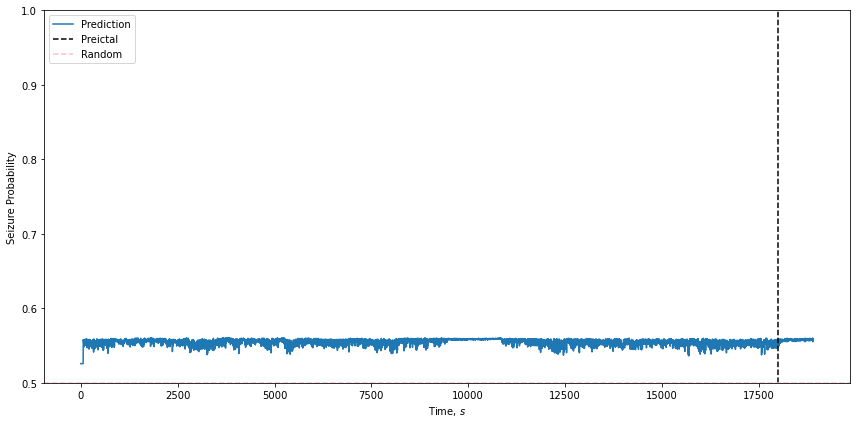

  1%|          | 2047/229887 [00:00<00:11, 20111.83it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▍         | 11263/229887 [00:00<00:01, 111452.16it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  5%|▍         | 10751/229887 [00:00<00:02, 106564.71it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  2%|▏         | 4095/229887 [00:00<00:06, 37539.42it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  3%|▎         | 6143/229887 [00:00<00:03, 61006.51it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:45<00:00, 105935.41it/s]


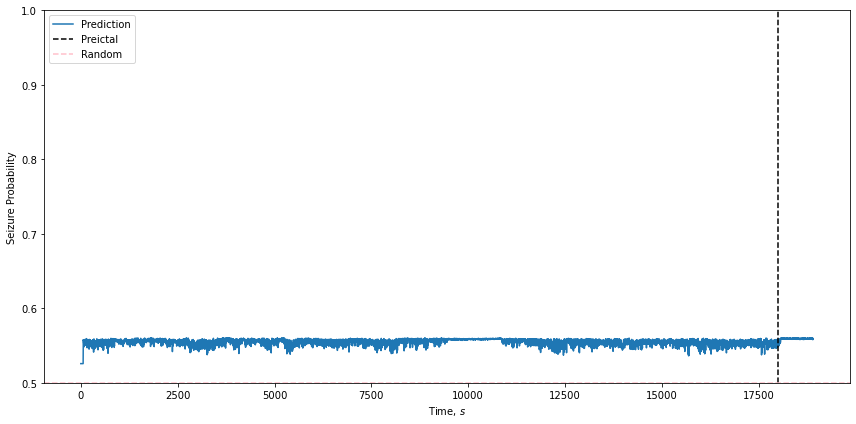

  0%|          | 3071/921086 [00:00<00:30, 30149.49it/s]

Run: 2
Interictal TRAIN: [5] Interictal TEST: [1 3 4 0 2]
5 chb01_08.edf (23, 921600)
1 chb01_02.edf (23, 921600)
3 chb01_06.edf (23, 921600)
4 chb01_07.edf (23, 921600)
0 chb01_01.edf (23, 921600)
2 chb01_05.edf (23, 921600)
---


  5%|▍         | 10751/229887 [00:00<00:02, 105828.42it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  4%|▍         | 10239/229887 [00:00<00:02, 98875.94it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▍         | 11263/229887 [00:00<00:01, 110246.60it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 115292.78it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  4%|▎         | 8164/229887 [00:00<00:02, 81635.99it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:47<00:00, 102452.51it/s]


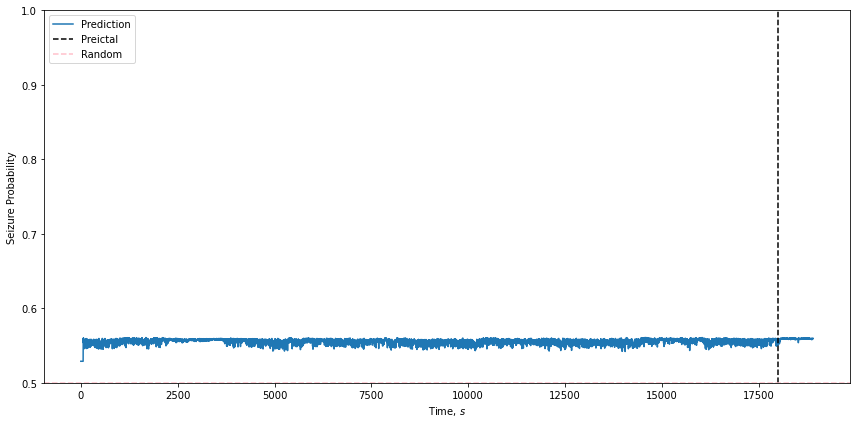

  1%|▏         | 3071/229887 [00:00<00:07, 29849.41it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 127675.98it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 143916.54it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 120912.71it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13479/229887 [00:00<00:01, 134750.93it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:51<00:00, 93914.65it/s] 


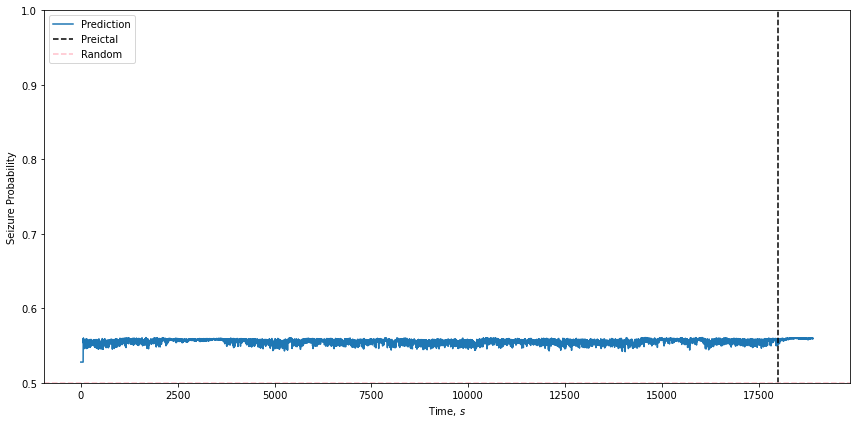

  5%|▍         | 10751/229887 [00:00<00:02, 104901.26it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 135533.87it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 147230.32it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 130524.41it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126667.07it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:47<00:00, 102769.91it/s]


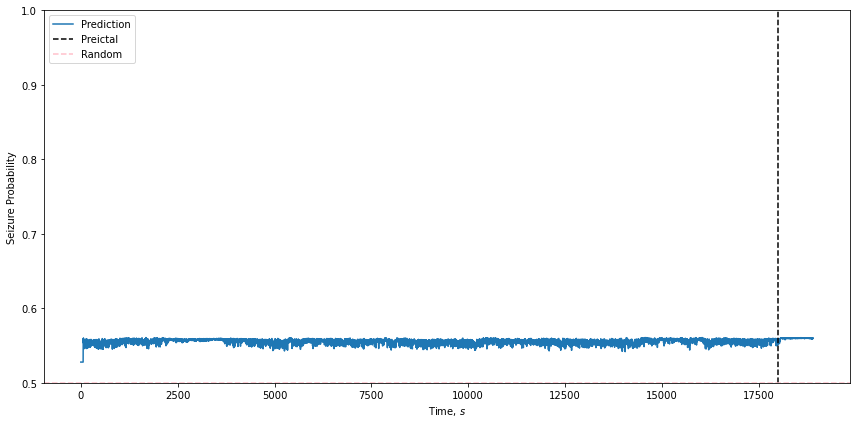

  5%|▍         | 10751/229887 [00:00<00:02, 105540.61it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  4%|▍         | 9215/229887 [00:00<00:02, 91069.02it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 138183.35it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 116035.16it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  3%|▎         | 7679/229887 [00:00<00:02, 76441.43it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:50<00:00, 95793.11it/s] 


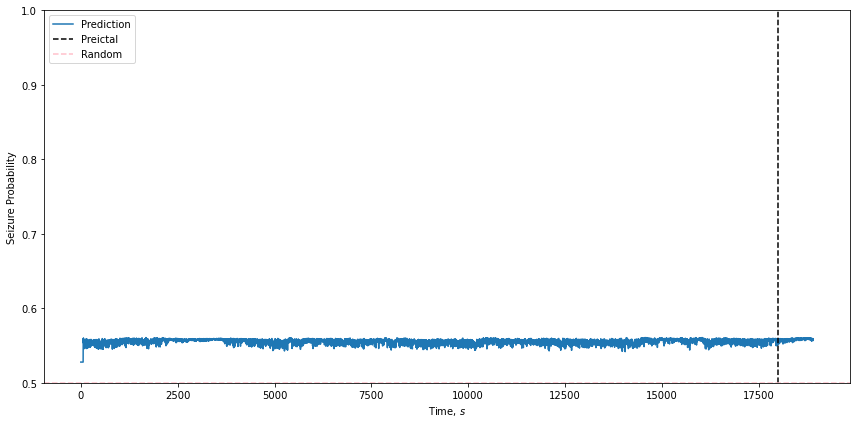

  3%|▎         | 6143/229887 [00:00<00:03, 56852.25it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  3%|▎         | 7679/229887 [00:00<00:02, 75217.15it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  4%|▍         | 8703/229887 [00:00<00:02, 83317.42it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  2%|▏         | 3583/229887 [00:00<00:06, 34769.13it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 121991.75it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:56<00:00, 86213.99it/s] 


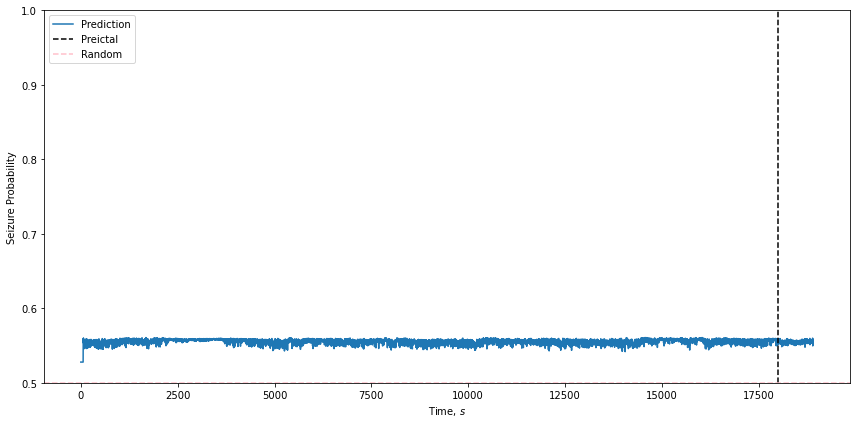

  2%|▏         | 3583/229887 [00:00<00:06, 34135.27it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 119434.00it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 125756.41it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131466.44it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 138483.42it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:44<00:00, 109383.11it/s]


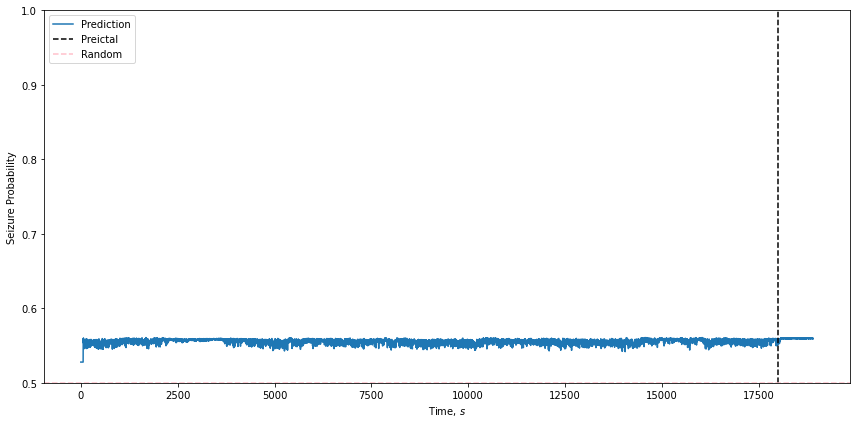

  1%|          | 9727/921086 [00:00<00:09, 94863.17it/s]

Run: 3
Interictal TRAIN: [0] Interictal TEST: [3 5 1 2 4]
0 chb01_01.edf (23, 921600)
3 chb01_06.edf (23, 921600)
5 chb01_08.edf (23, 921600)
1 chb01_02.edf (23, 921600)
2 chb01_05.edf (23, 921600)
4 chb01_07.edf (23, 921600)
---


  6%|▌         | 14335/229887 [00:00<00:01, 142782.99it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126627.63it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 141493.71it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 145913.53it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137969.28it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:45<00:00, 107156.68it/s]


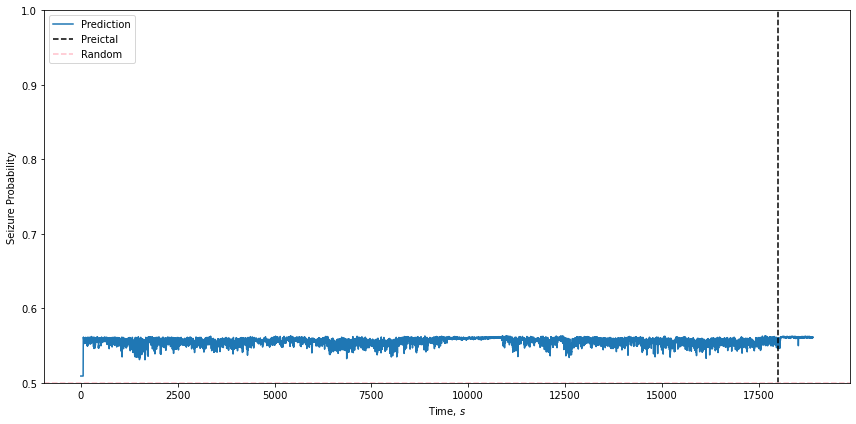

  4%|▍         | 10102/229887 [00:00<00:02, 101015.76it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 116538.96it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137495.82it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126980.17it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137248.78it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 115693.50it/s]


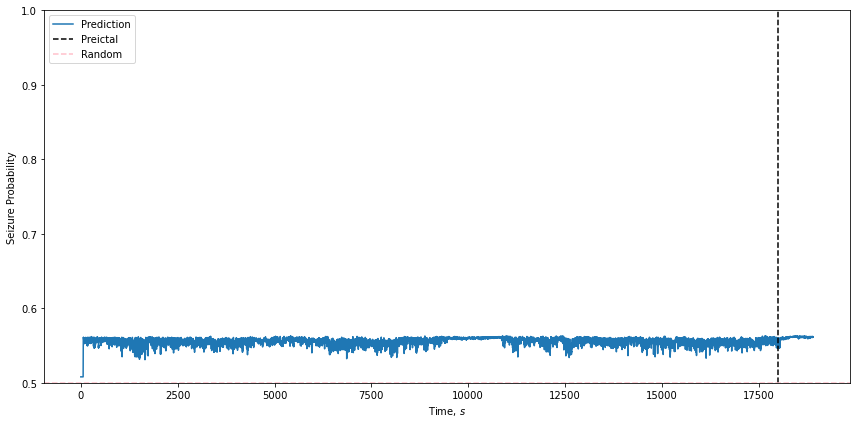

  3%|▎         | 7167/229887 [00:00<00:03, 71039.83it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 122865.14it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  3%|▎         | 7537/229887 [00:00<00:02, 75366.12it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▍         | 10568/229887 [00:00<00:02, 105675.82it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 136596.24it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:45<00:00, 106276.38it/s]


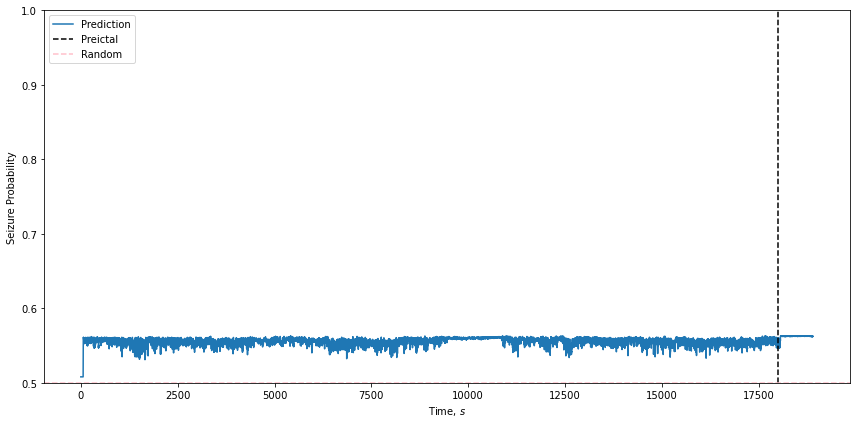

  9%|▉         | 20479/229887 [00:00<00:01, 110097.16it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 127718.20it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 129932.98it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 140316.52it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  5%|▍         | 11263/229887 [00:00<00:01, 110226.02it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:46<00:00, 104853.10it/s]


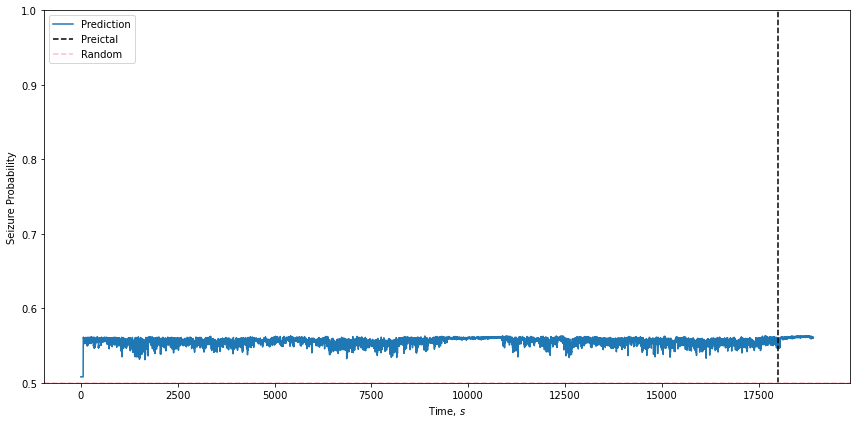

  4%|▍         | 9727/229887 [00:00<00:02, 94825.25it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 136514.22it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 125750.23it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 142122.16it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 136120.00it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 115470.80it/s]


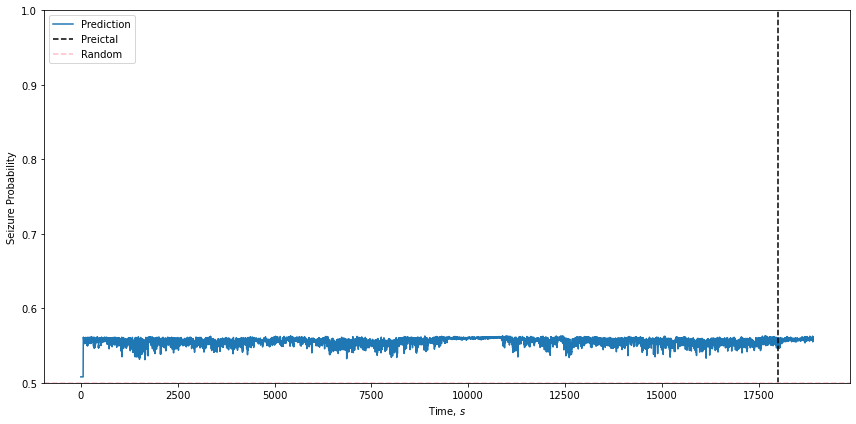

  2%|▏         | 3583/229887 [00:00<00:06, 35022.75it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 142408.96it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 115879.43it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131638.48it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126785.53it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 117577.47it/s]


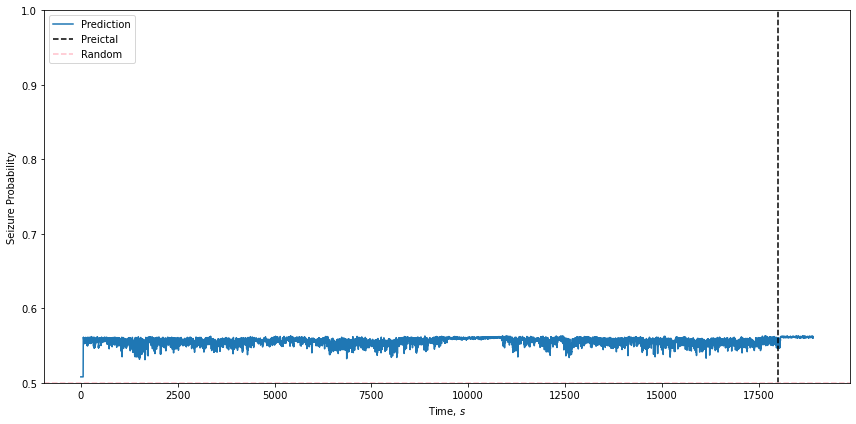

  1%|          | 4607/921086 [00:00<00:19, 45984.09it/s]

Run: 4
Interictal TRAIN: [0] Interictal TEST: [5 2 3 4 1]
0 chb01_01.edf (23, 921600)
5 chb01_08.edf (23, 921600)
2 chb01_05.edf (23, 921600)
3 chb01_06.edf (23, 921600)
4 chb01_07.edf (23, 921600)
1 chb01_02.edf (23, 921600)
---


  6%|▌         | 14335/229887 [00:00<00:01, 140891.27it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 143216.97it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137416.63it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 134185.34it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 135672.47it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 117639.30it/s]


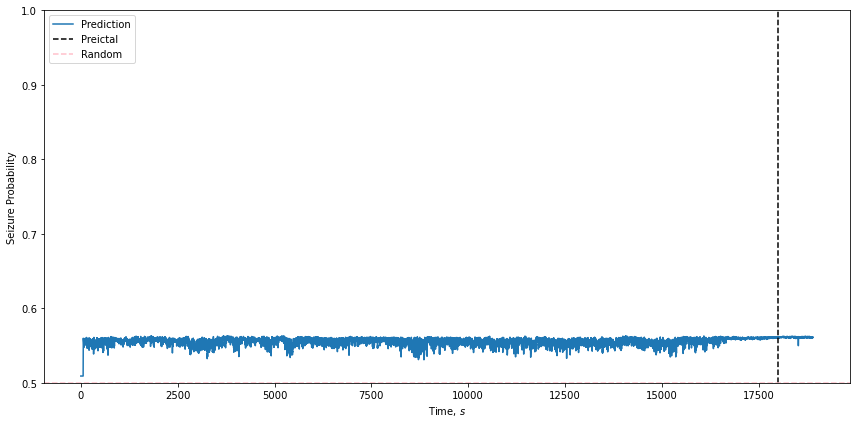

  4%|▍         | 9727/229887 [00:00<00:02, 97197.10it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▍         | 11263/229887 [00:00<00:01, 109964.56it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▍         | 10751/229887 [00:00<00:02, 107333.02it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131061.23it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131033.24it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 115646.31it/s]


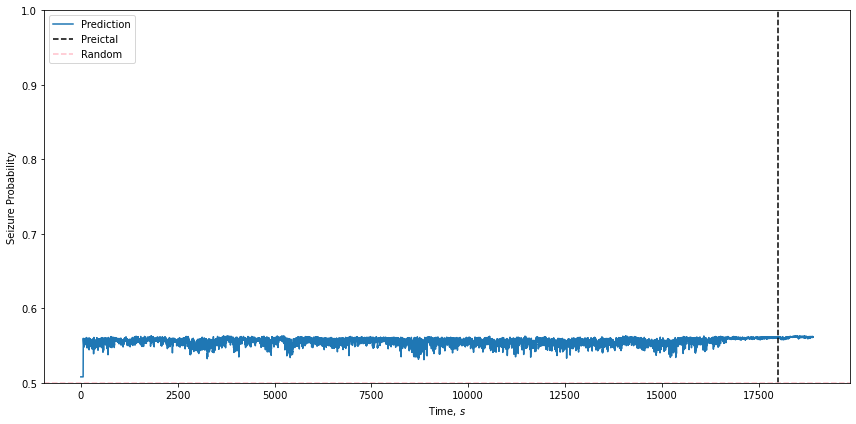

 10%|█         | 23551/229887 [00:00<00:01, 120299.89it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  3%|▎         | 6143/229887 [00:00<00:03, 59835.28it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 133532.32it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 137797.45it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 147643.27it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:45<00:00, 105938.42it/s]


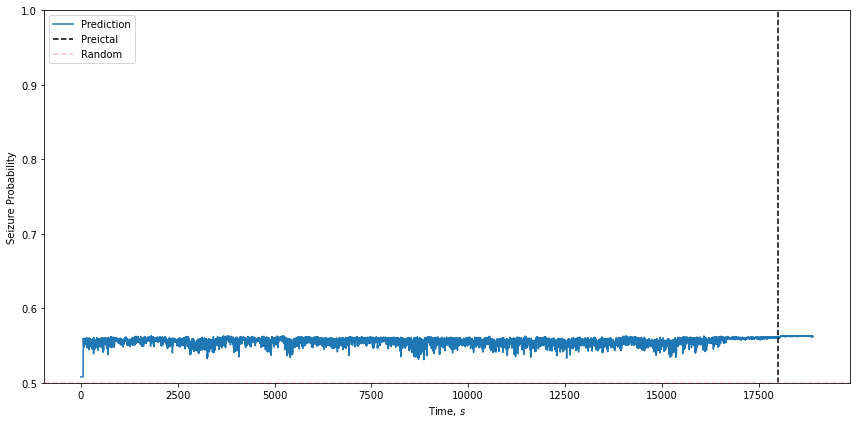

 11%|█         | 25599/229887 [00:00<00:01, 130093.44it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 116013.36it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 114006.96it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  4%|▍         | 10239/229887 [00:00<00:02, 94994.68it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  3%|▎         | 7167/229887 [00:00<00:03, 70245.50it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:42<00:00, 114001.48it/s]


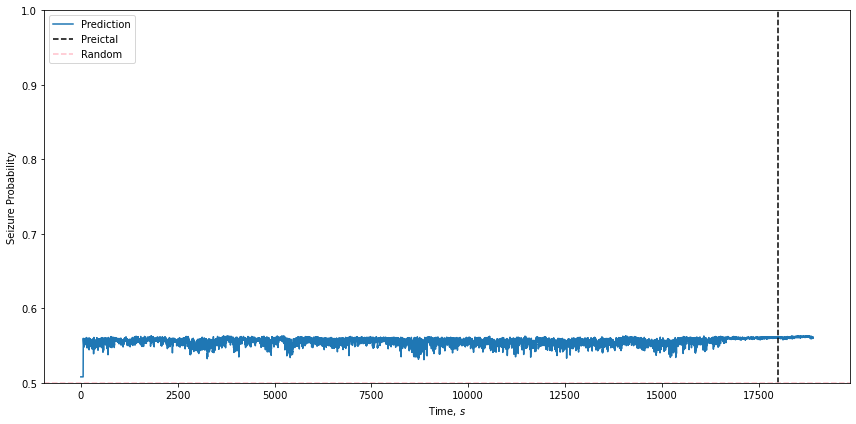

 11%|█         | 25087/229887 [00:00<00:01, 123967.48it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 141195.33it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▋         | 14706/229887 [00:00<00:01, 147053.83it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126785.53it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 139996.99it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:41<00:00, 116643.24it/s]


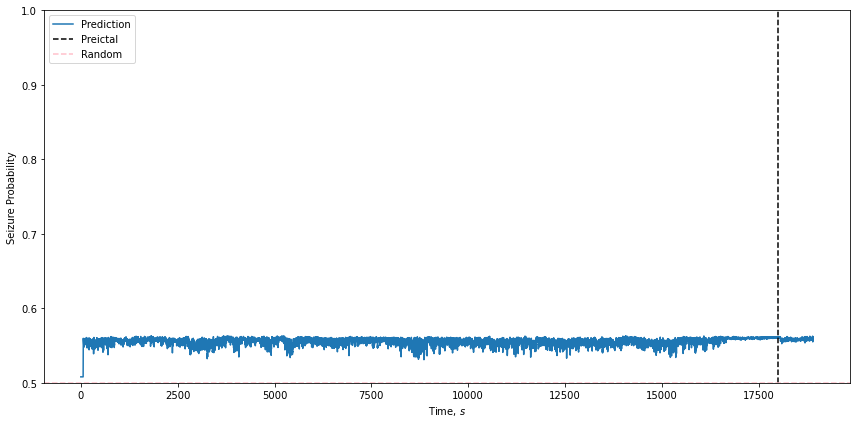

  5%|▍         | 10751/229887 [00:00<00:02, 106111.57it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 135488.57it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 145849.28it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 147144.05it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  7%|▋         | 15359/229887 [00:00<00:01, 151982.02it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:46<00:00, 104949.16it/s]


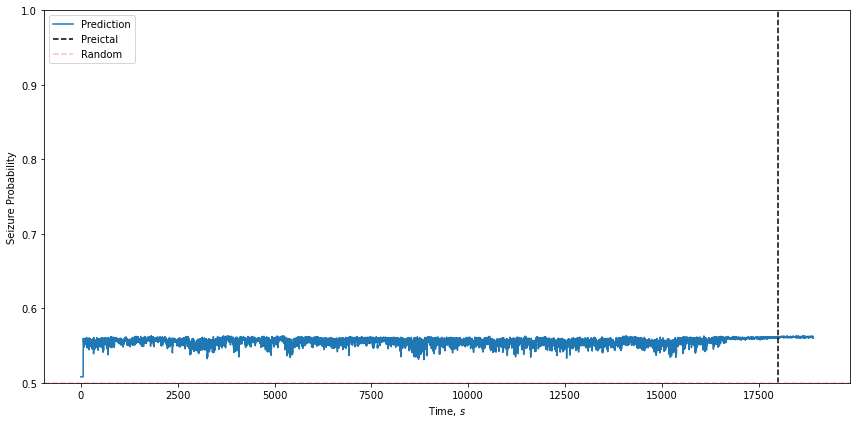

  2%|▏         | 16895/921086 [00:00<00:10, 88655.94it/s]

Run: 5
Interictal TRAIN: [0] Interictal TEST: [2 4 3 5 1]
0 chb01_01.edf (23, 921600)
2 chb01_05.edf (23, 921600)
4 chb01_07.edf (23, 921600)
3 chb01_06.edf (23, 921600)
5 chb01_08.edf (23, 921600)
1 chb01_02.edf (23, 921600)
---


  5%|▌         | 12287/229887 [00:00<00:01, 120193.33it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 130158.04it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 115452.78it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 134116.43it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  7%|▋         | 15294/229887 [00:00<00:01, 152935.77it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:37<00:00, 129785.08it/s]


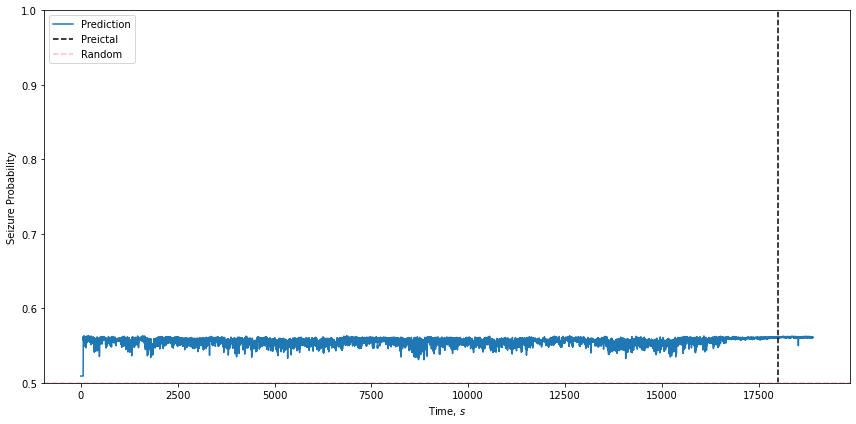

  5%|▍         | 10751/229887 [00:00<00:02, 103410.94it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 136725.73it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 141433.47it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  7%|▋         | 15106/229887 [00:00<00:01, 151055.46it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  7%|▋         | 15359/229887 [00:00<00:01, 151343.96it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:37<00:00, 130486.34it/s]


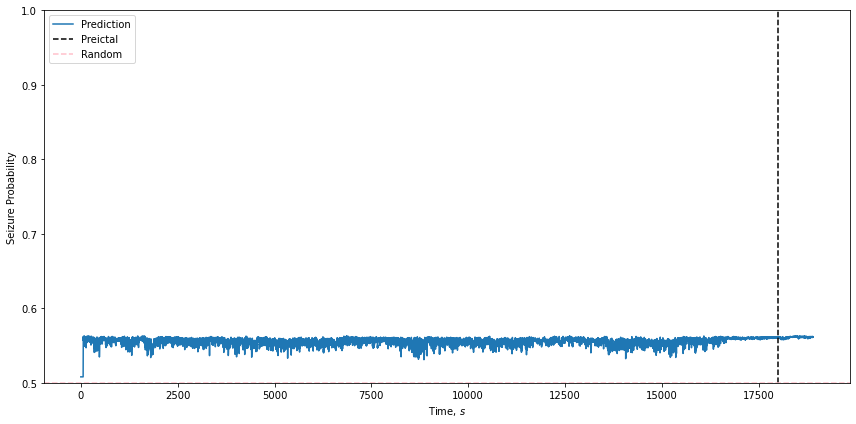

  3%|▎         | 6655/229887 [00:00<00:03, 65860.42it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 116448.95it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▋         | 14888/229887 [00:00<00:01, 148871.27it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131592.56it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 140824.94it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:39<00:00, 122710.79it/s]


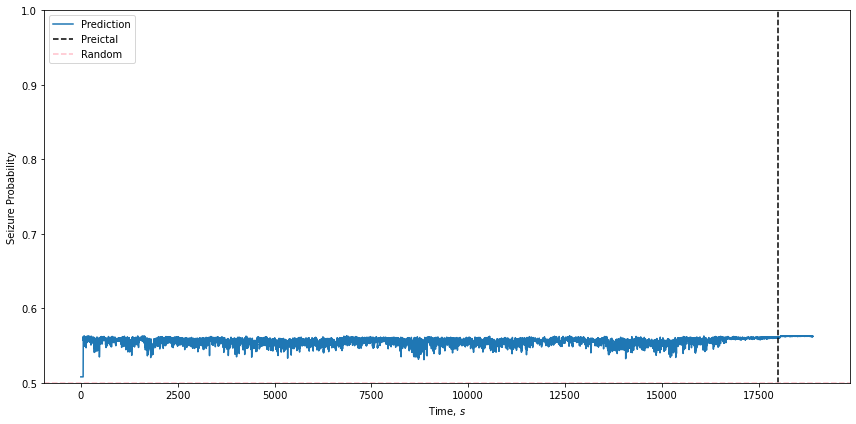

  3%|▎         | 6143/229887 [00:00<00:06, 32347.24it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  3%|▎         | 7002/229887 [00:00<00:03, 70017.73it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 132286.00it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  7%|▋         | 15050/229887 [00:00<00:01, 150494.40it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▌         | 14085/229887 [00:00<00:01, 140844.76it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:37<00:00, 128473.52it/s]


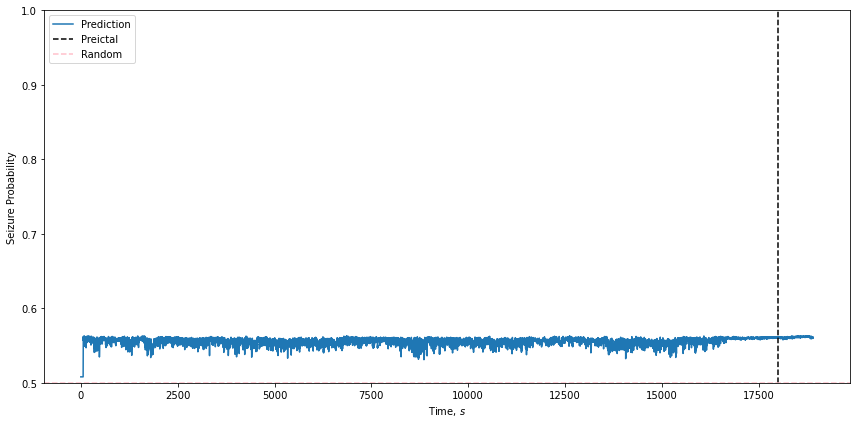

  4%|▍         | 8703/229887 [00:00<00:02, 86002.19it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 140836.15it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 13823/229887 [00:00<00:01, 138182.03it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 120966.35it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 126933.93it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:38<00:00, 126584.46it/s]


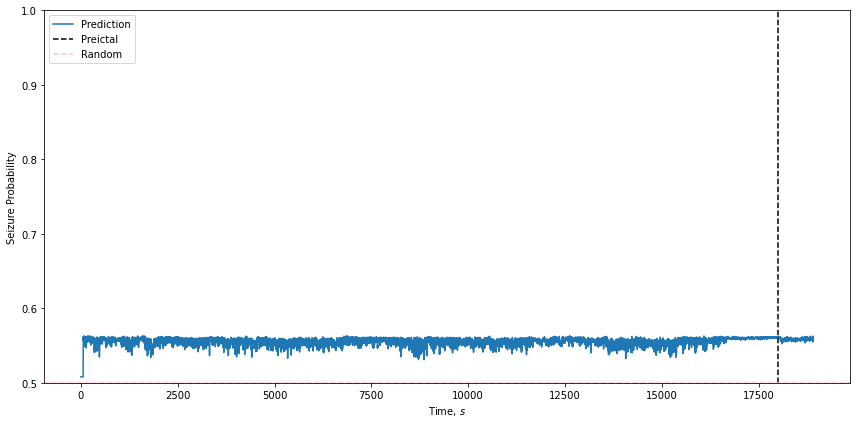

 12%|█▏        | 26623/229887 [00:00<00:01, 136179.79it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 143058.17it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  4%|▍         | 10239/229887 [00:00<00:02, 101733.75it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 140598.04it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 147890.47it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:37<00:00, 128821.73it/s]


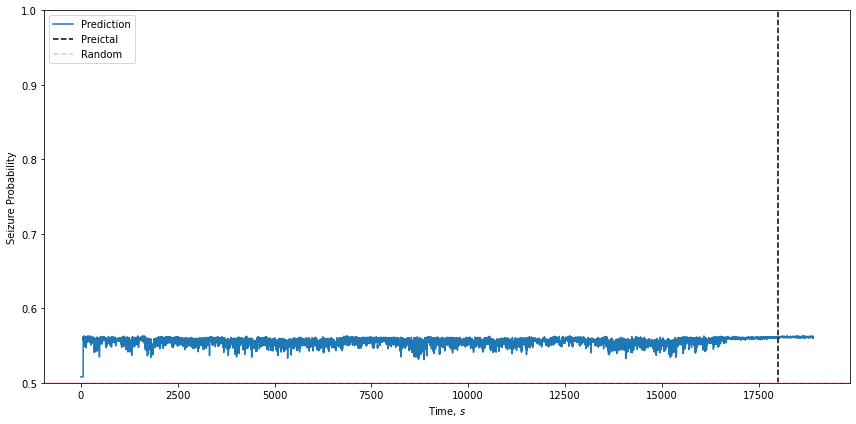

  3%|▎         | 25599/921086 [00:00<00:06, 132384.00it/s]

Run: 6
Interictal TRAIN: [5] Interictal TEST: [3 1 4 2 0]
5 chb01_08.edf (23, 921600)
3 chb01_06.edf (23, 921600)
1 chb01_02.edf (23, 921600)
4 chb01_07.edf (23, 921600)
2 chb01_05.edf (23, 921600)
0 chb01_01.edf (23, 921600)
---


  7%|▋         | 15359/229887 [00:00<00:01, 152798.88it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  7%|▋         | 15871/229887 [00:00<00:01, 157427.25it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 147898.90it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 143122.54it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  7%|▋         | 15871/229887 [00:00<00:01, 156892.96it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:37<00:00, 127644.10it/s]


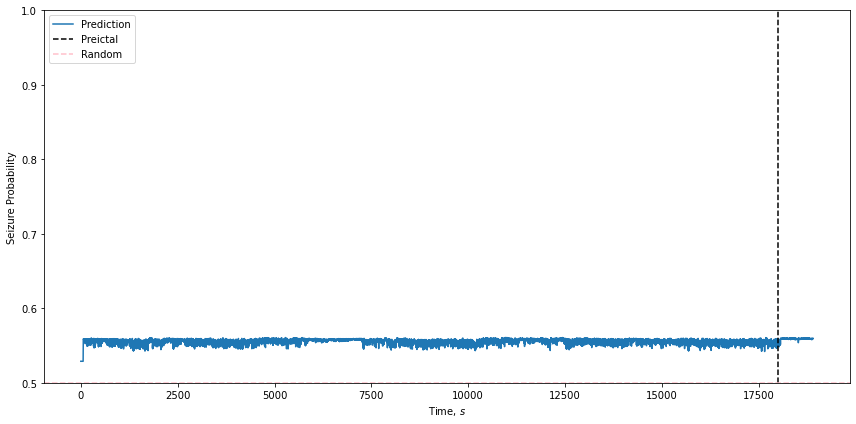

 11%|█         | 25599/229887 [00:00<00:01, 132126.41it/s]

  Preictal TRAIN: [0 2 3 4 5] Preictal TEST: [1]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 114763.84it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 125866.69it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  7%|▋         | 15359/229887 [00:00<00:01, 151035.62it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 146822.79it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:39<00:00, 121728.65it/s]


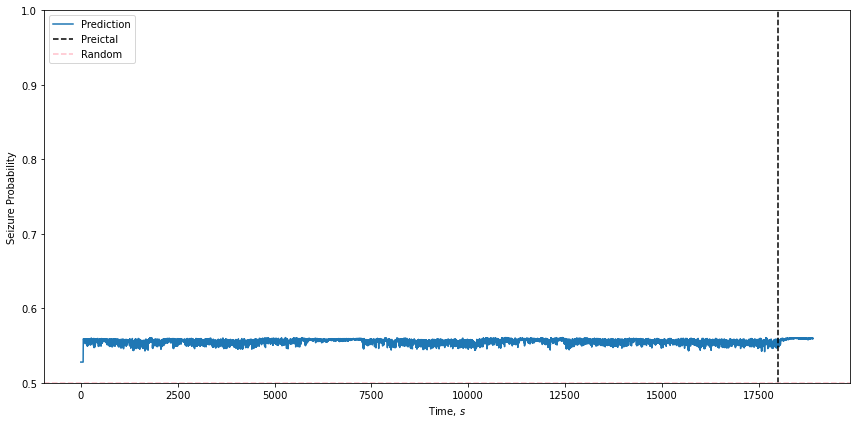

 12%|█▏        | 26623/229887 [00:00<00:01, 135877.42it/s]

  Preictal TRAIN: [0 1 3 4 5] Preictal TEST: [2]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 148045.17it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 115674.79it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  4%|▍         | 10239/229887 [00:00<00:02, 100513.45it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  4%|▍         | 9215/229887 [00:00<00:02, 90075.54it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:52<00:00, 92287.95it/s] 


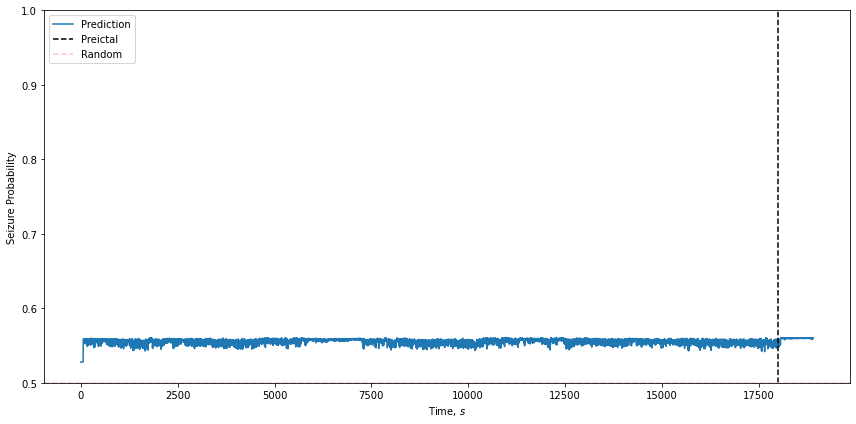

 11%|█         | 25599/229887 [00:00<00:01, 132514.14it/s]

  Preictal TRAIN: [0 1 2 4 5] Preictal TEST: [3]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 146592.26it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 140966.25it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  4%|▍         | 9215/229887 [00:00<00:02, 86111.04it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  5%|▍         | 11263/229887 [00:00<00:01, 111141.70it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:40<00:00, 120688.72it/s]


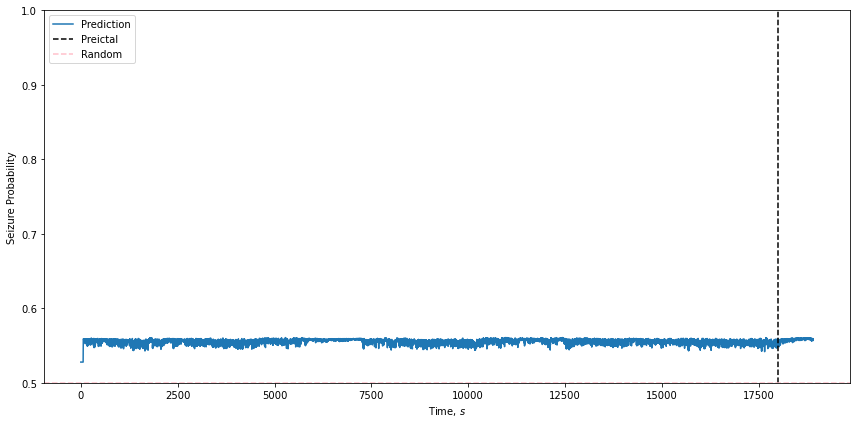

 11%|█         | 25220/229887 [00:00<00:01, 129675.68it/s]

  Preictal TRAIN: [0 1 2 3 5] Preictal TEST: [4]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 132862.73it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 14335/229887 [00:00<00:01, 141772.30it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 132111.33it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  7%|▋         | 15359/229887 [00:00<00:01, 150711.60it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:38<00:00, 124592.15it/s]


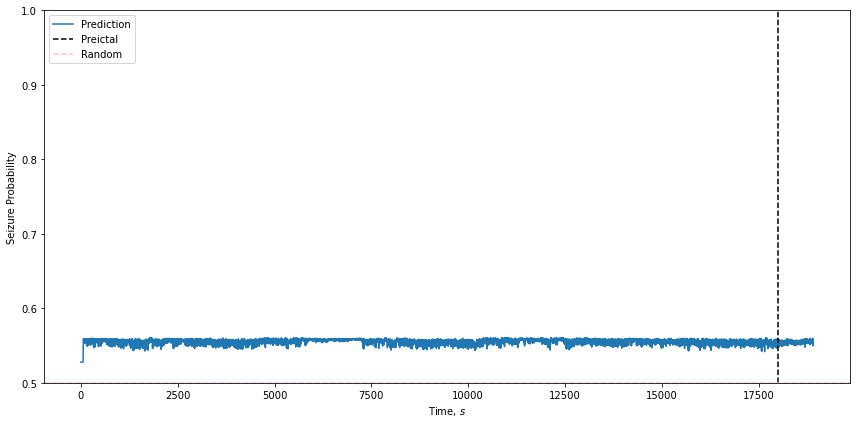

 11%|█         | 24218/229887 [00:00<00:01, 124210.66it/s]

  Preictal TRAIN: [0 1 2 3 4] Preictal TEST: [5]
   0 chb01_03_preictal.npy (23, 230401)
  ---


  5%|▌         | 11775/229887 [00:00<00:01, 117688.94it/s]

   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 146017.20it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  6%|▌         | 13311/229887 [00:00<00:01, 131148.97it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


 13%|█▎        | 30719/229887 [00:00<00:01, 153762.73it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


Predicting...: 100%|██████████| 4837887/4837887 [00:39<00:00, 122765.65it/s]


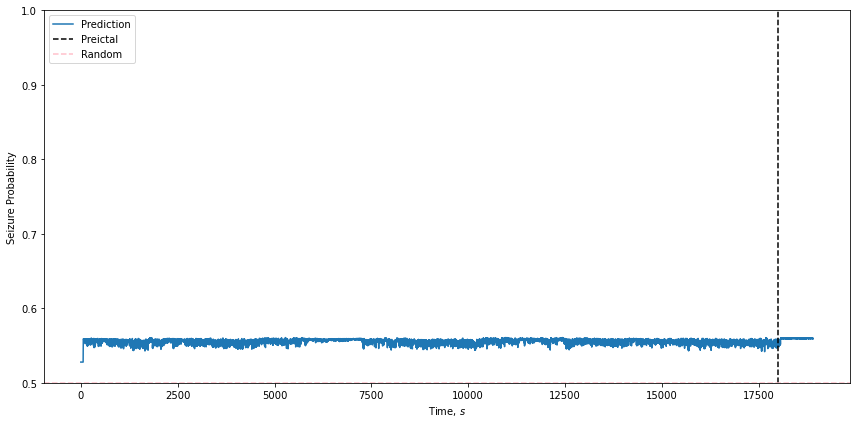

In [143]:
# Cross Validation and Shuffle Split
X_preictal = np.array(preictal_data_list)
y_preictal = np.array(preictal_target_list)

X_interictal = np.array(interictal_data_list)
y_interictal = np.array(interictal_target_list)

kf = KFold(n_splits=6)
kf.get_n_splits(X_preictal)
print(kf)

rs = ShuffleSplit(n_splits=len(interictal_filenames), test_size=.80, random_state=0)
rs.get_n_splits(X_interictal)
print(rs)

ar = ARMA(window_width=N, order=n_i, memory=m, seed=seed)

print('-')
run = 1
for interictal_train_index, interictal_test_index in rs.split(X_interictal, y_interictal):
    print('Run:', run)
    print("Interictal TRAIN:", interictal_train_index, "Interictal TEST:", interictal_test_index)
    print(interictal_train_index[0], interictal_filenames[interictal_train_index[0]], X_interictal[interictal_train_index[0]].shape)
    for interictal_test_idx in interictal_test_index:
        print(interictal_test_idx, interictal_filenames[interictal_test_idx], X_interictal[interictal_test_idx].shape)
    print("---") # arbitrary units (a.u)
    
    model = LogisticRegression(random_state=seed)
    # interictal feature extraction TRAIN
    _, _, interictal_train_features = ar.spin(sig=X_interictal[interictal_train_index[0]], fs=256)
    interictal_train_targets = -1 * np.ones(interictal_train_features.shape[0])
    fold = 1
    for preictal_train_index, preictal_test_index in kf.split(X_preictal, y_preictal):
        print("  Preictal TRAIN:", preictal_train_index, "Preictal TEST:", preictal_test_index)
        preictal_MA_train_list = []
        preictal_train_targets_list = []
        for preictal_train_idx in preictal_train_index:
            print('  ', preictal_train_idx, preictal_filenames[preictal_train_idx], X_preictal[preictal_train_idx].shape)
            print("  ---")
            # preictal feature extraction TRAIN
            _, _, preictal_MA = ar.spin(sig=X_preictal[preictal_train_index[0]], fs=256)
            preictal_target = np.ones(preictal_MA.shape[0])
            preictal_MA_train_list.append(preictal_MA)
            preictal_train_targets_list.append(preictal_target)
        preictal_train_features = np.vstack(preictal_MA_train_list)
        preictal_train_targets = np.hstack(preictal_train_targets_list)
        # TRAIN set
        X = np.concatenate((interictal_train_features, preictal_train_features), axis=0)
        y = np.hstack((interictal_train_targets, preictal_train_targets))
        X_mean = np.mean(X, axis=2)
        # model TRAIN
        model.fit(X_mean, y)
        
        # load TEST set
        interictal_test_data_list = []
        interictal_test_targets_list = []
        for interictal_test_idx in interictal_test_index:
            interictal_test_data_list.append(X_interictal[interictal_test_idx])
            interictal_test_targets_list.append(X_interictal[interictal_test_idx].shape[0])
        interictal_test_data = np.hstack(interictal_test_data_list)
        interictal_test_targets = np.hstack(interictal_test_targets_list)
        X_test = np.concatenate((interictal_test_data, X_preictal[preictal_test_index[0]]), axis=1)
        
        # online prediction
        n_samples = X_test.shape[1]               # Length of input signal
        e = X_test                                # Feed input signal
        a = 1.8 * np.random.randn(n_c, n_i)       # Initialise AR coefficients
        c = m*np.ones(m)                          # Initialise MA coefficients
        c = c/c.sum()

        k = np.zeros(1)
        Ik = N                                    # Set window width
        ar_index_list = []                        # Sequential buffer of time index
        ar_hats_list = []                         # Sequential buffer of AR coefficients (conisder replacing these with vstack)
        a_ma_list = []
#         model_1_proba_list = []
#         model_2_proba_list = []
        pred_sig_list = []
        for t in tqdm(range(Ik + n_i, n_samples), desc='Predicting...'): # Moving window starting from index 1 to (n_samples-1)
            if (t % N == 0):                       # Decimation policy: a is computed once every N samples
                window_start = t - Ik - n_i + 1
                window_end = t 
                a_hat = np.zeros((n_c, n_i))
                phi = np.zeros((n_c, n_i))
                for i in range(n_c):                          # Iterate electrodes
                    x_t = e[i, window_start:window_end]       # Multi-channel window over input signal
                    N_window = len(x_t)
                    ymat = np.zeros((N_window-n_i, n_i))
                    yb = np.zeros((N_window-n_i, n_i))

                    for _c in range(n_i, 0, -1):
                        ymat[:, n_i-_c] = x_t[n_i-_c:-_c]

                    yb = x_t[n_i:]
                    a_hat[i] = np.linalg.pinv(ymat) @ yb

                a_ma = np.zeros((n_c, n_i))
                ar_hats_k = len(ar_hats_list)-1               # Index to most recent block of AR parameters of shape: (n_c, n_i)
                for j in range(m):                            # MA smoothing of AR parameters going back m units of time, in timescale k (+1 ensures it goes up to m)
                    if len(ar_hats_list) > m:                 # Only begin smoothing once unit of time passed is greater than m (MA lookback parameter) 
                        a_ma = c[j] * ar_hats_list[ar_hats_k-j]
                a1 = a_ma[:,0]
                a2 = a_ma[:,1]
                a_mean = np.mean(a_ma, axis=1).reshape(1,-1)
                pred = model.predict_proba(a_mean)[:,1]       # select positive class probability
                pred_sig_list.append(pred)
                ar_index_list.append(t)                       # Record time index of when a is computed
                ar_hats_list.append(a_hat)
                a_ma_list.append(a_ma)

        ar_index = np.array(ar_index_list)
        ar_hats = np.array(ar_hats_list)
        ars = np.array(a_ma_list)
        pred_sig = np.array(pred_sig_list)
        
        t = np.arange(0, ar_hats.shape[0]) / (fs/N)
        plt.figure(figsize=(12,6))
        plt.plot(t, pred_sig, label='Prediction')
        plt.axvline(x=3600*5, ls='--', color='k', label='Preictal')
#         plt.axhline(y=0.90, ls='--', color='r', label='Threshold')
        plt.axhline(y=0.50, ls='--', color='pink', label='Random')
        plt.ylim([0.5,1])
        plt.xlabel('Time, $s$')
        plt.ylabel('Seizure Probability')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'../figures/classification/chb01/online_pred_R{run}_kF{fold}.pdf')
        plt.show()
        
        fold += 1
    run += 1

  1%|▏         | 12799/921086 [00:00<00:07, 125363.77it/s]

KFold(n_splits=6, random_state=None, shuffle=False)
ShuffleSplit(n_splits=6, random_state=0, test_size=0.8, train_size=None)
-
Run: 1
Interictal TRAIN: [4] Interictal TEST: [5 2 1 3 0]
4 chb01_07.edf (23, 921600)
5 chb01_08.edf (23, 921600)
2 chb01_05.edf (23, 921600)
1 chb01_02.edf (23, 921600)
3 chb01_06.edf (23, 921600)
0 chb01_01.edf (23, 921600)
---


  6%|▌         | 12799/229887 [00:00<00:01, 126543.45it/s]

  Preictal TRAIN: [1 2 3 4 5] Preictal TEST: [0]
   1 chb01_04_preictal.npy (23, 230401)
  ---


  6%|▌         | 12799/229887 [00:00<00:01, 127441.98it/s]

   2 chb01_15_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 122546.68it/s]

   3 chb01_16_preictal.npy (23, 230401)
  ---


  5%|▌         | 12287/229887 [00:00<00:01, 121597.98it/s]

   4 chb01_18_preictal.npy (23, 230401)
  ---


  6%|▋         | 14847/229887 [00:00<00:01, 145893.71it/s]

   5 chb01_26_preictal.npy (23, 230401)
  ---


100%|██████████| 229887/229887 [00:01<00:00, 131660.41it/s]


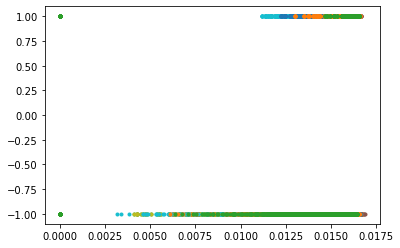

Learning...


Predicting...:   2%|▏         | 76798/4837887 [00:01<02:03, 38452.80it/s]


KeyboardInterrupt: 

In [148]:
# Cross Validation and Shuffle Split
X_preictal = np.array(preictal_data_list)
y_preictal = np.array(preictal_target_list)

X_interictal = np.array(interictal_data_list)
y_interictal = np.array(interictal_target_list)

kf = KFold(n_splits=6)
kf.get_n_splits(X_preictal)
print(kf)

rs = ShuffleSplit(n_splits=len(interictal_filenames), test_size=.80, random_state=0)
rs.get_n_splits(X_interictal)
print(rs)

ar = ARMA(window_width=N, order=n_i, memory=m, seed=seed)

print('-')
run = 1
for interictal_train_index, interictal_test_index in rs.split(X_interictal, y_interictal):
    print('Run:', run)
    print("Interictal TRAIN:", interictal_train_index, "Interictal TEST:", interictal_test_index)
    print(interictal_train_index[0], interictal_filenames[interictal_train_index[0]], X_interictal[interictal_train_index[0]].shape)
    for interictal_test_idx in interictal_test_index:
        print(interictal_test_idx, interictal_filenames[interictal_test_idx], X_interictal[interictal_test_idx].shape)
    print("---") # arbitrary units (a.u)
    
    model = LogisticRegression(random_state=seed)
    # interictal feature extraction TRAIN
    _, _, interictal_train_features = ar.spin(sig=X_interictal[interictal_train_index[0]], fs=256)
    interictal_train_targets = -1 * np.ones(interictal_train_features.shape[0])
    fold = 1
    for preictal_train_index, preictal_test_index in kf.split(X_preictal, y_preictal):
        print("  Preictal TRAIN:", preictal_train_index, "Preictal TEST:", preictal_test_index)
        preictal_MA_train_list = []
        preictal_train_targets_list = []
        for preictal_train_idx in preictal_train_index:
            print('  ', preictal_train_idx, preictal_filenames[preictal_train_idx], X_preictal[preictal_train_idx].shape)
            print("  ---")
            # preictal feature extraction TRAIN
            _, _, preictal_MA = ar.spin(sig=X_preictal[preictal_train_index[0]], fs=256)
            preictal_target = np.ones(preictal_MA.shape[0])
            preictal_MA_train_list.append(preictal_MA)
            preictal_train_targets_list.append(preictal_target)
        preictal_train_features = np.vstack(preictal_MA_train_list)
        preictal_train_targets = np.hstack(preictal_train_targets_list)
        # TRAIN set
        X = np.concatenate((interictal_train_features, preictal_train_features), axis=0)
        y = np.hstack((interictal_train_targets, preictal_train_targets))
        X_mean = np.mean(X, axis=2)
        
        plt.figure()
        plt.plot(X_mean, y, '.')
        plt.show()
        
        # model TRAIN
        print('Learning...')
        model.fit(X_mean, y)
        
        # load TEST set
        interictal_test_data_list = []
        interictal_test_targets_list = []
        for interictal_test_idx in interictal_test_index:
            interictal_test_data_list.append(X_interictal[interictal_test_idx])
            interictal_test_targets_list.append(X_interictal[interictal_test_idx].shape[0])
        interictal_test_data = np.hstack(interictal_test_data_list)
        interictal_test_targets = np.hstack(interictal_test_targets_list)
        X_test = np.concatenate((interictal_test_data, X_preictal[preictal_test_index[0]]), axis=1)
        
        # online prediction
        n_samples = X_test.shape[1]               # Length of input signal
        e = X_test                                # Feed input signal
        a = 1.8 * np.random.randn(n_c, n_i)       # Initialise AR coefficients
        c = m*np.ones(m)                          # Initialise MA coefficients
        c = c/c.sum()

        k = np.zeros(1)
        Ik = N                                    # Set window width
        ar_index_list = []                        # Sequential buffer of time index
        ar_hats_list = []                         # Sequential buffer of AR coefficients (conisder replacing these with vstack)
        a_ma_list = []
#         model_1_proba_list = []
#         model_2_proba_list = []
        pred_sig_list = []
        for t in tqdm(range(Ik + n_i, n_samples), desc='Predicting...'): # Moving window starting from index 1 to (n_samples-1)
            if (t % N == 0):                       # Decimation policy: a is computed once every N samples
                window_start = t - Ik - n_i + 1
                window_end = t 
                a_hat = np.zeros((n_c, n_i))
                phi = np.zeros((n_c, n_i))
                for i in range(n_c):                          # Iterate electrodes
                    x_t = e[i, window_start:window_end]       # Multi-channel window over input signal
                    N_window = len(x_t)
                    ymat = np.zeros((N_window-n_i, n_i))
                    yb = np.zeros((N_window-n_i, n_i))

                    for _c in range(n_i, 0, -1):
                        ymat[:, n_i-_c] = x_t[n_i-_c:-_c]

                    yb = x_t[n_i:]
                    a_hat[i] = np.linalg.pinv(ymat) @ yb

                a_ma = np.zeros((n_c, n_i))
                ar_hats_k = len(ar_hats_list)-1               # Index to most recent block of AR parameters of shape: (n_c, n_i)
                for j in range(m):                            # MA smoothing of AR parameters going back m units of time, in timescale k (+1 ensures it goes up to m)
                    if len(ar_hats_list) > m:                 # Only begin smoothing once unit of time passed is greater than m (MA lookback parameter) 
                        a_ma = c[j] * ar_hats_list[ar_hats_k-j]
                a1 = a_ma[:,0]
                a2 = a_ma[:,1]
                a_mean = np.mean(a_ma, axis=1).reshape(1,-1)
                pred = model.predict(a_mean)       # select positive class probability
                pred_sig_list.append(pred)
                ar_index_list.append(t)                       # Record time index of when a is computed
                ar_hats_list.append(a_hat)
                a_ma_list.append(a_ma)

        ar_index = np.array(ar_index_list)
        ar_hats = np.array(ar_hats_list)
        ars = np.array(a_ma_list)
        pred_sig = np.array(pred_sig_list)
        
        t = np.arange(0, ar_hats.shape[0]) / (fs/N)
        plt.figure(figsize=(12,6))
        plt.plot(t, pred_sig, label='Prediction')
        plt.axvline(x=3600*5, ls='--', color='k', label='Preictal')
#         plt.axhline(y=0.90, ls='--', color='r', label='Threshold')
        plt.axhline(y=0.50, ls='--', color='pink', label='Random')
        plt.ylim([0.5,1])
        plt.xlabel('Time, $s$')
        plt.ylabel('Seizure Probability')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'../figures/classification/chb01/svm/online_SVM_linear_kernel_R{run}_kF{fold}.pdf')
        plt.show()
        
        fold += 1
    run += 1

In [149]:
X.shape

(4043, 23, 2)

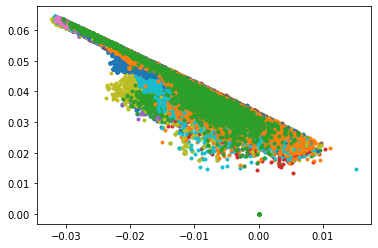

In [152]:
a1 = X[:,:,0]
a2 = X[:,:,1]
plt.figure()
plt.plot(a1, a2, '.')
plt.show()

In [86]:
print(interictal_test_data.shape, X_preictal[preictal_test_index[0]].shape)

(23, 4608000) (23, 230401)


In [89]:
4608000+230401

4838401

In [88]:
X_test.shape

(23, 4838401)

In [97]:
a_mean = np.mean(np.array([a1, a2]), axis=0).reshape(1,-1)
print(a_mean.shape)
model.predict_proba(a_mean)

(1, 23)


array([[0.47317456, 0.52682544]])

In [123]:
# online prediction
n_samples = X_test.shape[1]               # Length of input signal
e = X_test                                # Feed input signal
a = 1.8 * np.random.randn(n_c, n_i)       # Initialise AR coefficients
c = m*np.ones(m)                          # Initialise MA coefficients
c = c/c.sum()

k = np.zeros(1)
Ik = N                                    # Set window width
ar_index_list = []                        # Sequential buffer of time index
ar_hats_list = []                         # Sequential buffer of AR coefficients (conisder replacing these with vstack)
a_ma_list = []
#         model_1_proba_list = []
#         model_2_proba_list = []
pred_sig_list = []
for t in tqdm(range(Ik + n_i, n_samples), desc='Predicting... '): # Moving window starting from index 1 to (n_samples-1)
    if (t % N == 0):                       # Decimation policy: a is computed once every N samples
        window_start = t - Ik - n_i + 1
        window_end = t 
        a_hat = np.zeros((n_c, n_i))
        phi = np.zeros((n_c, n_i))
        for i in range(n_c):                          # Iterate electrodes
            x_t = e[i, window_start:window_end]       # Multi-channel window over input signal
            N_window = len(x_t)
            ymat = np.zeros((N_window-n_i, n_i))
            yb = np.zeros((N_window-n_i, n_i))

            for _c in range(n_i, 0, -1):
                ymat[:, n_i-_c] = x_t[n_i-_c:-_c]

            yb = x_t[n_i:]
            a_hat[i] = np.linalg.pinv(ymat) @ yb

        a_ma = np.zeros((n_c, n_i))
        ar_hats_k = len(ar_hats_list)-1               # Index to most recent block of AR parameters of shape: (n_c, n_i)
        for j in range(m):                            # MA smoothing of AR parameters going back m units of time, in timescale k (+1 ensures it goes up to m)
            if len(ar_hats_list) > m:                 # Only begin smoothing once unit of time passed is greater than m (MA lookback parameter) 
                a_ma = c[j] * ar_hats_list[ar_hats_k-j]
        a1 = a_ma[:,0]
        a2 = a_ma[:,1]
        a_mean = np.mean(a_ma, axis=1).reshape(1,-1)
        pred = model.predict_proba(a_mean)[:,1] # select positive class probability
#                 pred_a1 = model.predict_proba(a1.reshape(1,-1))[:,1]
#                 pred_a2 = model.predict_proba(a2.reshape(1,-1))[:,1]
#                 pred_mean = np.mean(np.concatenate((pred_a1, pred_a2), axis=0), axis=0)
#                 model_1_proba_list.append(pred_a1)
#                 model_2_proba_list.append(pred_a2)
        pred_sig_list.append(pred)
        ar_index_list.append(t)                       # Record time index of when a is computed
        ar_hats_list.append(a_hat)
        a_ma_list.append(a_ma)

ar_index = np.array(ar_index_list)
ar_hats = np.array(ar_hats_list)
ars = np.array(a_ma_list)
pred_sig = np.array(pred_sig_list)

Predicting... : 100%|██████████| 4837887/4837887 [00:50<00:00, 94882.03it/s] 


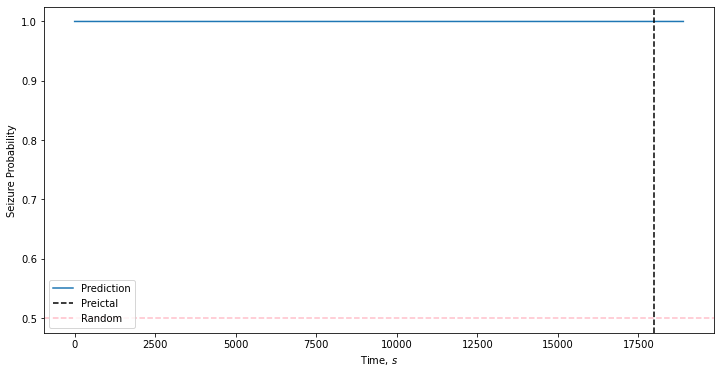

In [147]:
t = np.arange(0, ar_hats.shape[0]) / (fs/N)
plt.figure(figsize=(12,6))
plt.plot(t, pred_sig, label='Prediction')
plt.axvline(x=3600*5, ls='--', color='k', label='Preictal')
plt.axhline(y=0.50, ls='--', color='pink', label='Random')
# plt.axhline(y=0.58, ls='--', color='r', label='Threshold')
# plt.ylim([0.5,.9])
plt.xlabel('Time, $s$')
plt.ylabel('Seizure Probability')
plt.legend(loc=3)
plt.show()